# Соответствие аудиозаписей звонков и CSV + заполнение столбца "Транскрибация" и "Аудиофайл"

## Подключение библиотек

In [ ]:
!pip install chardet

In [ ]:
import os
import chardet
import pandas as pd
from dataclasses import dataclass

## Назначение переменных

In [ ]:
# Назначаем пути к датасетам
df_old_headliner_path = '/content/drive/MyDrive/Datasets/Звонки/Рабочие датасеты/old_Headliner_fix.csv'
df_old_primavera_path = '/content/drive/MyDrive/Datasets/Звонки/Рабочие датасеты/old_Primavera_fix.csv'
df_old_paveleckaya_turbo_path = '/content/drive/MyDrive/Datasets/Звонки/Рабочие датасеты/old_Paveleckaya_turbo_fix.csv'
df_old_paveleckaya_gk_path = '/content/drive/MyDrive/Datasets/Звонки/Рабочие датасеты/old_Paveleckaya_gk_fix.csv'
df_new_headliner_path = '/content/drive/MyDrive/Datasets/Звонки/Рабочие датасеты/New_Headliner_fix.csv'
df_new_primavera_path = '/content/drive/MyDrive/Datasets/Звонки/Рабочие датасеты/New_Primavera_fix.csv'
df_new_paveleckaya_path = '/content/drive/MyDrive/Datasets/Звонки/Рабочие датасеты/New_Paveleckaya_fix.csv'

In [ ]:
# Считываем нужный датасет и записываем в переменную
df_old_headliner = pd.read_csv(filepath_or_buffer=df_old_headliner_path,
                           dtype={'Идентификатор сессии звонка': str})
# Считываем нужный датасет и записываем в переменную
df_old_primavera = pd.read_csv(filepath_or_buffer=df_old_primavera_path,
                           dtype={'Идентификатор сессии звонка': str})
# Считываем нужный датасет и записываем в переменную
df_old_paveleckaya_turbo = pd.read_csv(filepath_or_buffer=df_old_paveleckaya_turbo_path,
                           dtype={'Идентификатор сессии звонка': str})
# Считываем нужный датасет и записываем в переменную
df_old_paveleckaya_gk = pd.read_csv(filepath_or_buffer=df_old_paveleckaya_gk_path,
                           dtype={'Идентификатор сессии звонка': str})
# Считываем нужный датасет и записываем в переменную
df_new_headliner = pd.read_csv(filepath_or_buffer=df_new_headliner_path,
                           dtype={'Идентификатор сессии звонка': str})
# Считываем нужный датасет и записываем в переменную
df_new_primavera = pd.read_csv(filepath_or_buffer=df_new_primavera_path,
                           dtype={'Идентификатор сессии звонка': str})
# Считываем нужный датасет и записываем в переменную
df_new_paveleckaya = pd.read_csv(filepath_or_buffer=df_new_paveleckaya_path,
                           dtype={'Идентификатор сессии звонка': str})

## Проверка на одинаковость столбцов

In [ ]:
# Считываем нужный датасет и записываем в переменную
df_headliner = pd.read_csv(filepath_or_buffer=df_old_headliner_path)

df_primavera = pd.read_csv(filepath_or_buffer=df_old_primavera_path)

df_paveleckaya_turbo = pd.read_csv(filepath_or_buffer=df_old_paveleckaya_turbo_path)

df_paveleckaya_gk = pd.read_csv(filepath_or_buffer=df_old_paveleckaya_gk_path)

df_new_headliner = pd.read_csv(filepath_or_buffer=df_new_headliner_path)

df_new_primavera = pd.read_csv(filepath_or_buffer=df_new_primavera_path)

df_new_paveleckaya = pd.read_csv(filepath_or_buffer=df_new_paveleckaya_path)

In [ ]:
columns_df1 = df_headliner.columns
columns_df2 = df_primavera.columns
columns_df3 = df_paveleckaya_turbo.columns
columns_df4 = df_paveleckaya_gk.columns
columns_df5 = df_new_headliner.columns
columns_df6 = df_new_primavera.columns
columns_df7 = df_new_paveleckaya.columns

In [ ]:
# Сравните списки колонок между датасетами
common_columns = set(columns_df1) & set(columns_df2) & set(columns_df3) & set(columns_df4)# & set(columns_df5) & set(columns_df6) & set(columns_df7)
# common_columns содержит названия колонок, которые есть во всех датасетах

common_columns_new = set(columns_df5) & set(columns_df6) & set(columns_df7)

# Выведите результаты
print("Общие колонки у старых датасетов:")
print(len(common_columns))

# Выведите результаты
print("Общие колонки у новых датасетов:")
print(len(common_columns_new))

print("Колонки, которых нет в новых датасетах")
print(common_columns-common_columns_new)

print("Одинаковые колонки в старых и новых датасетах:", common_columns==common_columns_new)

Общие колонки у старых датасетов:
72
Общие колонки у новых датасетов:
72
Колонки, которых нет в новых датасетах
set()
Одинаковые колонки в старых и новых датасетах: True


## Общий раздел для обработки всех датасетов

### Переменные

In [ ]:
# Создаем dataclass для типизации данных
@dataclass
class TextAudio:
  session: str
  talk: str

In [ ]:
# Задаем базовую директорию, где хранятся все файлы по проекту
BASE_DIR = '/content/drive/MyDrive/Datasets/Звонки'

In [ ]:
# Задаем путь до папки с транскрибациями звонков
transkrib_path = os.path.join(BASE_DIR, 'Транскрибация')

# Задаем путь до папки с рабочими датасетами
work_datasets_path = os.path.join(BASE_DIR, 'Рабочие датасеты')

# Задаем пути до папок с транскрибациями по датасетам
text_audio_old_headliner_path = os.path.join(transkrib_path, 'old_Headliner')
text_audio_old_primavera_path = os.path.join(transkrib_path, 'old_Primavera')
text_audio_old_paveleckaya_path = os.path.join(transkrib_path, 'old_Paveleckaya')
text_audio_new_headliner_path = os.path.join(transkrib_path, 'new_Headliner')
text_audio_new_primavera_path = os.path.join(transkrib_path, 'new_Primavera')
text_audio_new_paveleckaya_path = os.path.join(transkrib_path, 'new_Paveleckaya')

In [ ]:
# Папка с CSV файлами
csv_folder = os.path.join(BASE_DIR, 'Рабочие датасеты')

### Функции

In [ ]:
# Функция для парсинга названия аудиозаписи
def parse_textaudio_file(audiofile: str)->TextAudio:
  parts = audiofile.split('_')
  session = parts[-2]
  talk = parts[-1]
  return TextAudio(session, talk)

In [ ]:
# Функция проверки на дубли файлов транскрибации и удаления дублей
def check_files_doubles(folder_path):
  doubles = []
  for filename in os.listdir(folder_path):
    if filename.endswith(".txt"):
          aud_data = parse_textaudio_file(filename)

          if aud_data.talk != 'talk.txt':
            file_path = os.path.join(folder_path, filename)
            doubles.append(file_path)
            # os.remove(file_path)
  print('Дублей файлов транскрибаций было:', len(doubles))

In [ ]:
# Парсим output_name_df чтоб вытащить название датасета
def parse_df_name(output_name):
    name_parts = output_name.split('_')[:2]
    name_df = '_'.join(name_parts)
    return name_df

In [ ]:
# Функция заполнения столбцов "Транскрибация" из текстового файла и "Аудиофайл"
def add_transkrib_to_df(df, path_to_text_audio_df, output_name_df):

  # Добавляем столбцы "Аудиофайл" и "Транскрибация" со значениями по умолчанию
  df['Имя датасета'] = parse_df_name(output_name_df)
  df['Аудиофайл'] = 'Нет аудиофайла'
  df['Транскрибация'] = 'Нет данных'
  not_found_files = []

  print("Обрабатываю датасет:", df['Имя датасета'][1])

  # Проверка файлов на дубли
  check_files_doubles(path_to_text_audio_df)

  # Проходим по всем файлам в папке и сопоставляем с датасетом
  for file in os.listdir(path_to_text_audio_df):
    # Извлеките session и talk из имени файла
    text_audio = parse_textaudio_file(file)

    # Найдите соответствующую запись в DataFrame
    matching_row = df[df['Идентификатор сессии звонка'] == text_audio.session]

    # Если совпадение найдено, добавьте имя файла в столбец 'Аудиофайл'
    if not matching_row.empty:
        new_file_name = file.replace('.txt', '.mp3')
        df.loc[matching_row.index, 'Аудиофайл'] = new_file_name
    else:
        not_found_files.append(file)

    # Откройте и прочитайте содержимое файла транскрибации
    file_path = os.path.join(path_to_text_audio_df, file)
    with open(file_path, 'rb') as transcription_file:
        result = chardet.detect(transcription_file.read())
        encoding = result['encoding']

    with open(file_path, 'r', encoding=encoding) as transcription_file:
        transcription_content = transcription_file.read()

    # Сохраните текст в столбце 'Транскрибация'
    df.loc[matching_row.index, 'Транскрибация'] = transcription_content

  # Сохраните список ненайденных файлов в "not_found_files.txt"
  if not_found_files:
    not_found_files_path = os.path.join(csv_folder, output_name_df.replace('.csv', '_not_found_files.txt'))
    with open(not_found_files_path, 'w', encoding='utf-8') as not_found_file:
      not_found_file.write('\n'.join(not_found_files))

  # Сохраните обновленный DataFrame
  df.to_csv(os.path.join(csv_folder, output_name_df), index=False)
  print('Количество файлов в папке:', len(os.listdir(path_to_text_audio_df)))
  print('Количество файлов вошедших в датасет:', df['Аудиофайл'].nunique()-1)
  print('Кол-во файлов в папке равно заполненным строкам столбца "Аудиофайл":', len(os.listdir(path_to_text_audio_df)) == df['Аудиофайл'].nunique()-1)
  print('Список файлов, не вошедших в датасет', len(not_found_files))
  print('-----------------------------------------------------------')

## Записываем обновленные датасеты с дополнительными полями

In [ ]:
add_transkrib_to_df(df_old_headliner, text_audio_old_headliner_path, 'old_Headliner_aud_trans.csv')
add_transkrib_to_df(df_old_primavera, text_audio_old_primavera_path, 'old_Primavera_aud_trans.csv')
add_transkrib_to_df(df_old_paveleckaya_turbo, text_audio_old_paveleckaya_path, 'old_PaveleckayaTurbo_aud_trans.csv')
add_transkrib_to_df(df_old_paveleckaya_gk, text_audio_old_paveleckaya_path, 'old_PaveleckayaGK_aud_trans.csv')
add_transkrib_to_df(df_new_headliner, text_audio_new_headliner_path, 'new_Headliner_aud_trans.csv')
add_transkrib_to_df(df_new_primavera, text_audio_new_primavera_path, 'new_Primavera_aud_trans.csv')
add_transkrib_to_df(df_new_paveleckaya, text_audio_new_paveleckaya_path, 'new_Paveleckaya_aud_trans.csv')

Обрабатываю датасет: old_Headliner
Дублей файлов транскрибаций было: 0
Количество файлов в папке: 2045
Количество файлов вошедших в датасет: 2045
Кол-во файлов в папке равно заполненным строкам столбца "Аудиофайл": True
Список файлов, не вошедших в датасет 0
-----------------------------------------------------------
Обрабатываю датасет: old_Primavera
Дублей файлов транскрибаций было: 0
Количество файлов в папке: 1983
Количество файлов вошедших в датасет: 1517
Кол-во файлов в папке равно заполненным строкам столбца "Аудиофайл": False
Список файлов, не вошедших в датасет 466
-----------------------------------------------------------
Обрабатываю датасет: old_PaveleckayaTurbo
Дублей файлов транскрибаций было: 0
Количество файлов в папке: 1000
Количество файлов вошедших в датасет: 8
Кол-во файлов в папке равно заполненным строкам столбца "Аудиофайл": False
Список файлов, не вошедших в датасет 992
-----------------------------------------------------------
Обрабатываю датасет: old_Paveleck

# Фильтруем и сохраняем датасеты только с аудиозаписями

## Подключение библиотек

In [ ]:
import os
import pandas as pd

## Назначение переменных

In [ ]:
# Назначаем пути к датасетам
df_old_headliner_path = '/content/drive/MyDrive/Datasets/Звонки/Рабочие датасеты/old_Headliner_aud_trans.csv'
df_old_primavera_path = '/content/drive/MyDrive/Datasets/Звонки/Рабочие датасеты/old_Primavera_aud_trans.csv'
df_old_paveleckaya_turbo_path = '/content/drive/MyDrive/Datasets/Звонки/Рабочие датасеты/old_PaveleckayaTurbo_aud_trans.csv'
df_old_paveleckaya_gk_path = '/content/drive/MyDrive/Datasets/Звонки/Рабочие датасеты/old_PaveleckayaGK_aud_trans.csv'
df_new_headliner_path = '/content/drive/MyDrive/Datasets/Звонки/Рабочие датасеты/new_Headliner_aud_trans.csv'
df_new_primavera_path = '/content/drive/MyDrive/Datasets/Звонки/Рабочие датасеты/new_Primavera_aud_trans.csv'
df_new_paveleckaya_path = '/content/drive/MyDrive/Datasets/Звонки/Рабочие датасеты/new_Paveleckaya_aud_trans.csv'

In [ ]:
# Задаем базовую директорию, где хранятся все файлы по проекту
BASE_DIR = '/content/drive/MyDrive/Datasets/Звонки'

# Папка с CSV файлами
csv_folder = os.path.join(BASE_DIR, 'Рабочие датасеты')

In [ ]:
# Считываем нужный датасет и записываем в переменную
df_old_headliner = pd.read_csv(filepath_or_buffer=df_old_headliner_path)
# Считываем нужный датасет и записываем в переменную
df_old_primavera = pd.read_csv(filepath_or_buffer=df_old_primavera_path)
# Считываем нужный датасет и записываем в переменную
df_old_paveleckaya_turbo = pd.read_csv(filepath_or_buffer=df_old_paveleckaya_turbo_path)
# Считываем нужный датасет и записываем в переменную
df_old_paveleckaya_gk = pd.read_csv(filepath_or_buffer=df_old_paveleckaya_gk_path)
# Считываем нужный датасет и записываем в переменную
df_new_headliner = pd.read_csv(filepath_or_buffer=df_new_headliner_path)
# Считываем нужный датасет и записываем в переменную
df_new_primavera = pd.read_csv(filepath_or_buffer=df_new_primavera_path)
# Считываем нужный датасет и записываем в переменную
df_new_paveleckaya = pd.read_csv(filepath_or_buffer=df_new_paveleckaya_path)

## Функции

In [ ]:
# Фильтруем и сохраняем датасет только с аудизаписями
def filter_df(df, out_name):
  print('Обрабатываю датасет:', df['Имя датасета'][1])
  with_audio = df[df['Аудиофайл'] != 'Нет аудиофайла']
  new_df = with_audio.to_csv(os.path.join(csv_folder, out_name), index=False)
  print('Новый датасет сохранен:', out_name)
  print('____________________________________________')

## Записываем отфильтрованные датасеты только с аудиозаписями

In [ ]:
filter_df(df_old_headliner, 'with_audio_old_Headliner.csv')
filter_df(df_old_primavera, 'with_audio_old_Primavera.csv')
filter_df(df_old_paveleckaya_turbo, 'with_audio_old_Paveleckaya_turbo.csv')
filter_df(df_old_paveleckaya_gk, 'with_audio_old_Paveleckaya_gk.csv')
filter_df(df_new_headliner, 'with_audio_new_Headliner.csv')
filter_df(df_new_primavera, 'with_audio_new_Primavera.csv')
filter_df(df_new_paveleckaya, 'with_audio_new_Paveleckaya.csv')

Обрабатываю датасет: old_Headliner
Новый датасет сохранен: with_audio_old_Headliner.csv
____________________________________________
Обрабатываю датасет: old_Primavera
Новый датасет сохранен: with_audio_old_Primavera.csv
____________________________________________
Обрабатываю датасет: old_PaveleckayaTurbo
Новый датасет сохранен: with_audio_old_Paveleckaya_turbo.csv
____________________________________________
Обрабатываю датасет: old_PaveleckayaGK
Новый датасет сохранен: with_audio_old_Paveleckaya_gk.csv
____________________________________________
Обрабатываю датасет: new_Headliner
Новый датасет сохранен: with_audio_new_Headliner.csv
____________________________________________
Обрабатываю датасет: new_Primavera
Новый датасет сохранен: with_audio_new_Primavera.csv
____________________________________________
Обрабатываю датасет: new_Paveleckaya
Новый датасет сохранен: with_audio_new_Paveleckaya.csv
____________________________________________


# Добавление столбца "Target" и определение строк на целевые/нецелевые

## Подключение библиотек

In [ ]:
import os
import re
import pandas as pd

## Назначение переменных

In [ ]:
# Назначаем пути к датасетам
df_old_headliner_path = '/content/drive/MyDrive/Datasets/Звонки/Рабочие датасеты/with_audio_old_Headliner.csv'
df_old_primavera_path = '/content/drive/MyDrive/Datasets/Звонки/Рабочие датасеты/with_audio_old_Primavera.csv'
df_old_paveleckaya_turbo_path = '/content/drive/MyDrive/Datasets/Звонки/Рабочие датасеты/with_audio_old_Paveleckaya_turbo.csv'
df_old_paveleckaya_gk_path = '/content/drive/MyDrive/Datasets/Звонки/Рабочие датасеты/with_audio_old_Paveleckaya_gk.csv'
df_new_headliner_path = '/content/drive/MyDrive/Datasets/Звонки/Рабочие датасеты/with_audio_new_Headliner.csv'
df_new_primavera_path = '/content/drive/MyDrive/Datasets/Звонки/Рабочие датасеты/with_audio_new_Primavera.csv'
df_new_paveleckaya_path = '/content/drive/MyDrive/Datasets/Звонки/Рабочие датасеты/with_audio_new_Paveleckaya.csv'

In [ ]:
# Задаем базовую директорию, где хранятся все файлы по проекту
BASE_DIR = '/content/drive/MyDrive/Datasets/Звонки'

# Папка с CSV файлами
csv_folder = os.path.join(BASE_DIR, 'Рабочие датасеты')

In [ ]:
# Считываем нужный датасет и записываем в переменную
df_old_headliner = pd.read_csv(filepath_or_buffer=df_old_headliner_path)
# Считываем нужный датасет и записываем в переменную
df_old_primavera = pd.read_csv(filepath_or_buffer=df_old_primavera_path)
# Считываем нужный датасет и записываем в переменную
df_old_paveleckaya_turbo = pd.read_csv(filepath_or_buffer=df_old_paveleckaya_turbo_path)
# Считываем нужный датасет и записываем в переменную
df_old_paveleckaya_gk = pd.read_csv(filepath_or_buffer=df_old_paveleckaya_gk_path)
# Считываем нужный датасет и записываем в переменную
df_new_headliner = pd.read_csv(filepath_or_buffer=df_new_headliner_path)
# Считываем нужный датасет и записываем в переменную
df_new_primavera = pd.read_csv(filepath_or_buffer=df_new_primavera_path)
# Считываем нужный датасет и записываем в переменную
df_new_paveleckaya = pd.read_csv(filepath_or_buffer=df_new_paveleckaya_path)

## Функции

In [ ]:
# Функция, заменяет пустые строки столбца "Теги" на "Нет инфо"
def fillna(df):
  df['Теги'].fillna("Нет инфо", inplace=True)
  return df

In [ ]:
# Функция добавляет столбец "Target" и проставляет 1 в целевые строки
def check_target_records(df, out_name_df):

    # Создаем новый столбец "Target" и устанавливаем значения по умолчанию в 0
    df['Target'] = 0

    # Заменяем пустые строки в столбце "Теги" на "Нет инфо"
    fillna(df)

    # Фильтруем записи в соответствии с заданными условиями и устанавливаем "Target" в 1 для целевых записей
    target_records = df[
    (
        (df['Теги'].str.startswith('Целевой_М108') | df['Теги'].str.contains('Целевой_М108', case=False))
        & ~df['Теги'].str.contains('Нецелевой_М108', case=False)
    ) |
    (
        df['Теги'].str.contains('первичный целевой', case=False)
        & ~df['Теги'].str.contains('постпродажное|вторичный|спорный|условно', case=False)
    )
    ]

    # Устанавливаем "Target" в 1 для найденных целевых записей
    df.loc[target_records.index, 'Target'] = 1

    # Подсчитываем количество записей с "Target" равным 0 и 1
    target_counts = df['Target'].value_counts()

    # Выводим информацию о количестве нецелевых строк
    if 0 in target_counts:
      ratio_0 = target_counts[0] / target_counts.sum()
      print(f"Количество нецелевых строк: {target_counts[0]} ({ratio_0:.2%})")
    else:
      print("Нет нецелевых строк")

    # Выводим информацию о количестве целевых строк
    if 1 in target_counts:
      ratio_1 = target_counts[1] / target_counts.sum()
      print(f"Количество целевых строк: {target_counts[1]} ({ratio_1:.2%})")
    else:
      print("Нет целевых строк")

    # Сохраняем новый датасет в CSV файл
    new_df = df.to_csv(os.path.join(csv_folder, out_name_df), index=False)
    print('Новый датасет сохранен:', out_name_df)
    print('____________________________________________')

## Записываем датасеты с проставленными целевыми и нецелевыми строками в столбце "Target"

In [ ]:
check_target_records(df_old_headliner, 'target_old_Headliner.csv')
check_target_records(df_old_primavera, 'target_old_Primavera.csv')
check_target_records(df_old_paveleckaya_turbo, 'target_old_Paveleckaya_turbo.csv')
check_target_records(df_old_paveleckaya_gk, 'target_old_Paveleckaya_gk.csv')
check_target_records(df_new_headliner, 'target_new_Headliner.csv')
check_target_records(df_new_primavera, 'target_new_Primavera.csv')
check_target_records(df_new_paveleckaya, 'target_new_Paveleckaya.csv')

Количество нецелевых строк: 1693 (82.79%)
Количество целевых строк: 352 (17.21%)
Новый датасет сохранен: target_old_Headliner.csv
____________________________________________
Количество нецелевых строк: 861 (56.76%)
Количество целевых строк: 656 (43.24%)
Новый датасет сохранен: target_old_Primavera.csv
____________________________________________
Количество нецелевых строк: 8 (100.00%)
Нет целевых строк
Новый датасет сохранен: target_old_Paveleckaya_turbo.csv
____________________________________________
Количество нецелевых строк: 691 (69.66%)
Количество целевых строк: 301 (30.34%)
Новый датасет сохранен: target_old_Paveleckaya_gk.csv
____________________________________________
Количество нецелевых строк: 1032 (84.18%)
Количество целевых строк: 194 (15.82%)
Новый датасет сохранен: target_new_Headliner.csv
____________________________________________
Количество нецелевых строк: 454 (59.19%)
Количество целевых строк: 313 (40.81%)
Новый датасет сохранен: target_new_Primavera.csv
________

# Отделение строк с пустыми тегами

## Подключение библиотек

In [ ]:
import os
import re
import pandas as pd

## Назначение переменных

In [ ]:
# Назначаем пути к датасетам
df_old_headliner_path = '/content/drive/MyDrive/Datasets/Звонки/Рабочие датасеты/target_old_Headliner.csv'
df_old_primavera_path = '/content/drive/MyDrive/Datasets/Звонки/Рабочие датасеты/target_old_Primavera.csv'
df_old_paveleckaya_turbo_path = '/content/drive/MyDrive/Datasets/Звонки/Рабочие датасеты/target_old_Paveleckaya_turbo.csv'
df_old_paveleckaya_gk_path = '/content/drive/MyDrive/Datasets/Звонки/Рабочие датасеты/target_old_Paveleckaya_gk.csv'
df_new_headliner_path = '/content/drive/MyDrive/Datasets/Звонки/Рабочие датасеты/target_new_Headliner.csv'
df_new_primavera_path = '/content/drive/MyDrive/Datasets/Звонки/Рабочие датасеты/target_new_Primavera.csv'
df_new_paveleckaya_path = '/content/drive/MyDrive/Datasets/Звонки/Рабочие датасеты/target_new_Paveleckaya.csv'

In [ ]:
# Задаем базовую директорию, где хранятся все файлы по проекту
BASE_DIR = '/content/drive/MyDrive/Datasets/Звонки'

# Папка с CSV файлами
csv_folder = os.path.join(BASE_DIR, 'Рабочие датасеты')

In [ ]:
# Считываем нужный датасет и записываем в переменную
df_old_headliner = pd.read_csv(filepath_or_buffer=df_old_headliner_path)
# Считываем нужный датасет и записываем в переменную
df_old_primavera = pd.read_csv(filepath_or_buffer=df_old_primavera_path)
# Считываем нужный датасет и записываем в переменную
df_old_paveleckaya_turbo = pd.read_csv(filepath_or_buffer=df_old_paveleckaya_turbo_path)
# Считываем нужный датасет и записываем в переменную
df_old_paveleckaya_gk = pd.read_csv(filepath_or_buffer=df_old_paveleckaya_gk_path)
# Считываем нужный датасет и записываем в переменную
df_new_headliner = pd.read_csv(filepath_or_buffer=df_new_headliner_path)
# Считываем нужный датасет и записываем в переменную
df_new_primavera = pd.read_csv(filepath_or_buffer=df_new_primavera_path)
# Считываем нужный датасет и записываем в переменную
df_new_paveleckaya = pd.read_csv(filepath_or_buffer=df_new_paveleckaya_path)

## Функции

In [ ]:
def tags_with_or_no_info(df, out_name_df):
  # Создайте датасет с строками, где 'Теги' не равно 'Нет инфо'
  df_without_no_info = df[df['Теги'] != 'Нет инфо']

  # Создайте датасет только с строками, где 'Теги' равно 'Нет инфо'
  df_no_info = df[df['Теги'] == 'Нет инфо']

  # Теперь вы можете сохранить оба датасета в отдельные файлы
  df_without_no_info.to_csv(os.path.join(csv_folder, out_name_df + "_without_no_info.csv"), index=False)
  df_no_info.to_csv(os.path.join(csv_folder, out_name_df + "_no_info.csv"), index=False)

## Записываем датасеты

In [ ]:
tags_with_or_no_info(df_old_headliner, 'target_old_Headliner')
tags_with_or_no_info(df_old_primavera, 'target_old_Primavera')
tags_with_or_no_info(df_old_paveleckaya_turbo, 'target_old_Paveleckaya_turbo')
tags_with_or_no_info(df_old_paveleckaya_gk, 'target_old_Paveleckaya_gk')
tags_with_or_no_info(df_new_headliner, 'target_new_Headliner')
tags_with_or_no_info(df_new_primavera, 'target_new_Primavera')
tags_with_or_no_info(df_new_paveleckaya, 'target_new_Paveleckaya')

# Объединение датасетов в один выкидываю датасет Paveleckaya turbo, т.к. там только 4 строки нецелевых

## Подключение библиотек

In [ ]:
import os
import re
import pandas as pd

## Назначение переменных

In [ ]:
# Назначаем пути к датасетам
df_old_headliner_path = '/content/drive/MyDrive/Datasets/Звонки/Рабочие датасеты/target_old_Headliner_without_no_info.csv'
df_old_primavera_path = '/content/drive/MyDrive/Datasets/Звонки/Рабочие датасеты/target_old_Primavera_without_no_info.csv'
df_old_paveleckaya_turbo_path = '/content/drive/MyDrive/Datasets/Звонки/Рабочие датасеты/target_old_Paveleckaya_turbo_without_no_info.csv'
df_old_paveleckaya_gk_path = '/content/drive/MyDrive/Datasets/Звонки/Рабочие датасеты/target_old_Paveleckaya_gk_without_no_info.csv'
df_new_headliner_path = '/content/drive/MyDrive/Datasets/Звонки/Рабочие датасеты/target_new_Headliner_without_no_info.csv'
df_new_primavera_path = '/content/drive/MyDrive/Datasets/Звонки/Рабочие датасеты/target_new_Primavera_without_no_info.csv'
df_new_paveleckaya_path = '/content/drive/MyDrive/Datasets/Звонки/Рабочие датасеты/target_new_Paveleckaya_without_no_info.csv'

In [ ]:
# Задаем базовую директорию, где хранятся все файлы по проекту
BASE_DIR = '/content/drive/MyDrive/Datasets/Звонки'

# Папка с CSV файлами
csv_folder = os.path.join(BASE_DIR, 'Рабочие датасеты')

In [ ]:
# Считываем нужный датасет и записываем в переменную
df_old_headliner = pd.read_csv(filepath_or_buffer=df_old_headliner_path)
# Считываем нужный датасет и записываем в переменную
df_old_primavera = pd.read_csv(filepath_or_buffer=df_old_primavera_path)
# Считываем нужный датасет и записываем в переменную
df_old_paveleckaya_turbo = pd.read_csv(filepath_or_buffer=df_old_paveleckaya_turbo_path)
# Считываем нужный датасет и записываем в переменную
df_old_paveleckaya_gk = pd.read_csv(filepath_or_buffer=df_old_paveleckaya_gk_path)
# Считываем нужный датасет и записываем в переменную
df_new_headliner = pd.read_csv(filepath_or_buffer=df_new_headliner_path)
# Считываем нужный датасет и записываем в переменную
df_new_primavera = pd.read_csv(filepath_or_buffer=df_new_primavera_path)
# Считываем нужный датасет и записываем в переменную
df_new_paveleckaya = pd.read_csv(filepath_or_buffer=df_new_paveleckaya_path)

## Объединяем датасеты

In [ ]:
# Создайте список всех датасетов
datasets = [df_old_headliner, df_old_primavera, df_old_paveleckaya_gk, df_new_headliner, df_new_primavera, df_new_paveleckaya]

# Объедините их в один датасет
merged_df = pd.concat(datasets, ignore_index=True)

## Записываем датасет

In [ ]:
merged_df.to_csv(os.path.join(csv_folder, "all_df_merged.csv"), index=False)

# Разбиваем датасеты на train 80%, val 10%, test 10% датасеты и сохраняем их

## Подключение библиотек

In [ ]:
import os
import re
import pandas as pd
import random
from sklearn.model_selection import train_test_split

## Назначение переменных

In [ ]:
# Назначаем пути к датасетам
df_old_headliner_path = '/content/drive/MyDrive/Datasets/Звонки/Рабочие датасеты/target_old_Headliner_without_no_info.csv'
df_old_primavera_path = '/content/drive/MyDrive/Datasets/Звонки/Рабочие датасеты/target_old_Primavera_without_no_info.csv'
df_old_paveleckaya_gk_path = '/content/drive/MyDrive/Datasets/Звонки/Рабочие датасеты/target_old_Paveleckaya_gk_without_no_info.csv'
df_new_headliner_path = '/content/drive/MyDrive/Datasets/Звонки/Рабочие датасеты/target_new_Headliner_without_no_info.csv'
df_new_primavera_path = '/content/drive/MyDrive/Datasets/Звонки/Рабочие датасеты/target_new_Primavera_without_no_info.csv'
df_new_paveleckaya_path = '/content/drive/MyDrive/Datasets/Звонки/Рабочие датасеты/target_new_Paveleckaya_without_no_info.csv'

In [ ]:
# Задаем базовую директорию, где хранятся все файлы по проекту
BASE_DIR = '/content/drive/MyDrive/Datasets/Звонки'

# Папка с CSV файлами
csv_folder = os.path.join(BASE_DIR, 'Рабочие датасеты')

In [ ]:
# Считываем нужный датасет и записываем в переменную
df_old_headliner = pd.read_csv(filepath_or_buffer=df_old_headliner_path)
# Считываем нужный датасет и записываем в переменную
df_old_primavera = pd.read_csv(filepath_or_buffer=df_old_primavera_path)
# Считываем нужный датасет и записываем в переменную
df_old_paveleckaya_gk = pd.read_csv(filepath_or_buffer=df_old_paveleckaya_gk_path)
# Считываем нужный датасет и записываем в переменную
df_new_headliner = pd.read_csv(filepath_or_buffer=df_new_headliner_path)
# Считываем нужный датасет и записываем в переменную
df_new_primavera = pd.read_csv(filepath_or_buffer=df_new_primavera_path)
# Считываем нужный датасет и записываем в переменную
df_new_paveleckaya = pd.read_csv(filepath_or_buffer=df_new_paveleckaya_path)

## Функции

In [ ]:
# Функция разделения датасета на тренировочный, валидационный и тестовый
def split_dataset(df, test_size=0.1, random_state=None, out_name_df='dataset'):
    # Делим на тренировочную и оставшуюся часть с учетом стратификации
    train_df, temp_df = train_test_split(df, test_size=test_size, random_state=random_state, stratify=df['Target'])

    # Делим оставшуюся часть на валидационную и тестовую с учетом стратификации
    val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=random_state, stratify=temp_df['Target'])

    # Сохраняем тренировочный, валидационный и тестовый датасеты
    train_df.to_csv(os.path.join(csv_folder, 'train_' + out_name_df + '.csv'), index=False)
    val_df.to_csv(os.path.join(csv_folder, 'val_' + out_name_df + '.csv'), index=False)
    test_df.to_csv(os.path.join(csv_folder, 'test_' + out_name_df + '.csv'), index=False)

## Записываем датасеты

In [ ]:
# Сохранение датасетов тренировочного, валидационного и тестового
split_dataset(df_old_headliner, test_size=0.1, random_state=42, out_name_df='old_Headliner')
split_dataset(df_old_primavera, test_size=0.1, random_state=42, out_name_df='old_Primavera')
split_dataset(df_old_paveleckaya_gk, test_size=0.1, random_state=42, out_name_df='old_Paveleckaya_gk')
split_dataset(df_new_headliner, test_size=0.1, random_state=42, out_name_df='new_Headliner')
split_dataset(df_new_primavera, test_size=0.1, random_state=42, out_name_df='new_Primavera')
split_dataset(df_new_paveleckaya, test_size=0.1, random_state=42, out_name_df='new_Paveleckaya')

# Объединение датасетов тренировочных, валидационных и тестовых

## Подключение библиотек

In [ ]:
import os
import pandas as pd

## Назначение переменных

In [ ]:
# Назначаем пути к train датасетам
train_df_old_headliner_path = '/content/drive/MyDrive/Datasets/Звонки/Рабочие датасеты/train_old_Headliner.csv'
train_df_old_primavera_path = '/content/drive/MyDrive/Datasets/Звонки/Рабочие датасеты/train_old_Primavera.csv'
train_df_old_paveleckaya_gk_path = '/content/drive/MyDrive/Datasets/Звонки/Рабочие датасеты/train_old_Paveleckaya_gk.csv'
train_df_new_headliner_path = '/content/drive/MyDrive/Datasets/Звонки/Рабочие датасеты/train_new_Headliner.csv'
train_df_new_primavera_path = '/content/drive/MyDrive/Datasets/Звонки/Рабочие датасеты/train_new_Primavera.csv'
train_df_new_paveleckaya_path = '/content/drive/MyDrive/Datasets/Звонки/Рабочие датасеты/train_new_Paveleckaya.csv'
# Назначаем пути к val датасетам
val_df_old_headliner_path = '/content/drive/MyDrive/Datasets/Звонки/Рабочие датасеты/val_old_Headliner.csv'
val_df_old_primavera_path = '/content/drive/MyDrive/Datasets/Звонки/Рабочие датасеты/val_old_Primavera.csv'
val_df_old_paveleckaya_gk_path = '/content/drive/MyDrive/Datasets/Звонки/Рабочие датасеты/val_old_Paveleckaya_gk.csv'
val_df_new_headliner_path = '/content/drive/MyDrive/Datasets/Звонки/Рабочие датасеты/val_new_Headliner.csv'
val_df_new_primavera_path = '/content/drive/MyDrive/Datasets/Звонки/Рабочие датасеты/val_new_Primavera.csv'
val_df_new_paveleckaya_path = '/content/drive/MyDrive/Datasets/Звонки/Рабочие датасеты/val_new_Paveleckaya.csv'
# Назначаем пути к test датасетам
test_df_old_headliner_path = '/content/drive/MyDrive/Datasets/Звонки/Рабочие датасеты/test_old_Headliner.csv'
test_df_old_primavera_path = '/content/drive/MyDrive/Datasets/Звонки/Рабочие датасеты/test_old_Primavera.csv'
test_df_old_paveleckaya_gk_path = '/content/drive/MyDrive/Datasets/Звонки/Рабочие датасеты/test_old_Paveleckaya_gk.csv'
test_df_new_headliner_path = '/content/drive/MyDrive/Datasets/Звонки/Рабочие датасеты/test_new_Headliner.csv'
test_df_new_primavera_path = '/content/drive/MyDrive/Datasets/Звонки/Рабочие датасеты/test_new_Primavera.csv'
test_df_new_paveleckaya_path = '/content/drive/MyDrive/Datasets/Звонки/Рабочие датасеты/test_new_Paveleckaya.csv'

In [ ]:
# Задаем базовую директорию, где хранятся все файлы по проекту
BASE_DIR = '/content/drive/MyDrive/Datasets/Звонки'

# Папка с CSV файлами
csv_folder = os.path.join(BASE_DIR, 'Рабочие датасеты')

In [ ]:
# Считываем train датасеты и записываем в переменную
train_df_old_headliner = pd.read_csv(filepath_or_buffer=train_df_old_headliner_path)
train_df_old_primavera = pd.read_csv(filepath_or_buffer=train_df_old_primavera_path)
train_df_old_paveleckaya_gk = pd.read_csv(filepath_or_buffer=train_df_old_paveleckaya_gk_path)
train_df_new_headliner = pd.read_csv(filepath_or_buffer=train_df_new_headliner_path)
train_df_new_primavera = pd.read_csv(filepath_or_buffer=train_df_new_primavera_path)
train_df_new_paveleckaya = pd.read_csv(filepath_or_buffer=train_df_new_paveleckaya_path)
# Считываем val датасеты и записываем в переменную
val_df_old_headliner = pd.read_csv(filepath_or_buffer=val_df_old_headliner_path)
val_df_old_primavera = pd.read_csv(filepath_or_buffer=val_df_old_primavera_path)
val_df_old_paveleckaya_gk = pd.read_csv(filepath_or_buffer=val_df_old_paveleckaya_gk_path)
val_df_new_headliner = pd.read_csv(filepath_or_buffer=val_df_new_headliner_path)
val_df_new_primavera = pd.read_csv(filepath_or_buffer=val_df_new_primavera_path)
val_df_new_paveleckaya = pd.read_csv(filepath_or_buffer=val_df_new_paveleckaya_path)
# Считываем test датасеты и записываем в переменную
test_df_old_headliner = pd.read_csv(filepath_or_buffer=test_df_old_headliner_path)
test_df_old_primavera = pd.read_csv(filepath_or_buffer=test_df_old_primavera_path)
test_df_old_paveleckaya_gk = pd.read_csv(filepath_or_buffer=test_df_old_paveleckaya_gk_path)
test_df_new_headliner = pd.read_csv(filepath_or_buffer=test_df_new_headliner_path)
test_df_new_primavera = pd.read_csv(filepath_or_buffer=test_df_new_primavera_path)
test_df_new_paveleckaya = pd.read_csv(filepath_or_buffer=test_df_new_paveleckaya_path)

## Объединяем датасеты

In [ ]:
# Создайте список всех датасетов
train_datasets = [train_df_old_headliner, train_df_old_primavera, train_df_old_paveleckaya_gk, train_df_new_headliner, train_df_new_primavera, train_df_new_paveleckaya]
val_datasets = [val_df_old_headliner, val_df_old_primavera, val_df_old_paveleckaya_gk, val_df_new_headliner, val_df_new_primavera, val_df_new_paveleckaya]
test_datasets = [test_df_old_headliner, test_df_old_primavera, test_df_old_paveleckaya_gk, test_df_new_headliner, test_df_new_primavera, test_df_new_primavera]

# Объедините их в один датасет
merged_df_train = pd.concat(train_datasets, ignore_index=True)
merged_df_val = pd.concat(val_datasets, ignore_index=True)
merged_df_test = pd.concat(test_datasets, ignore_index=True)

## Записываем датасет

In [ ]:
merged_df_train.to_csv(os.path.join(csv_folder, "all_train_df_merged.csv"), index=False)
merged_df_val.to_csv(os.path.join(csv_folder, "all_val_df_merged.csv"), index=False)
merged_df_test.to_csv(os.path.join(csv_folder, "all_test_df_merged.csv"), index=False)

# Удаление столбцов из датасетов, заполненых менее чем x%. Не использовал в train, val, test датасетах, т.к. всё равно выбирал столбцы для обучения руками

## Подключение библиотек

In [ ]:
import os
import pandas as pd

## Назначение переменных

In [ ]:
# Назначаем пути к датасетам
df_all_datasets_path = '/content/drive/MyDrive/Datasets/Звонки/Рабочие датасеты/all_df_merged.csv'
df_all_datasets_5_path = '/content/drive/MyDrive/Datasets/Звонки/Рабочие датасеты/all_df_merged_5%.csv'
df_all_datasets_95_path = '/content/drive/MyDrive/Datasets/Звонки/Рабочие датасеты/all_df_merged_95%.csv'

In [ ]:
# Задаем базовую директорию, где хранятся все файлы по проекту
BASE_DIR = '/content/drive/MyDrive/Datasets/Звонки'

# Папка с CSV файлами
csv_folder = os.path.join(BASE_DIR, 'Рабочие датасеты')

In [ ]:
# Устанавливаем минимальную заполненность столбцов в %
percent_to_drop = 80

In [ ]:
# Считываем нужный датасет и записываем в переменную
df_all_datasets = pd.read_csv(filepath_or_buffer=df_all_datasets_path)
# Считываем нужный датасет и записываем в переменную
df_all_datasets_5 = pd.read_csv(filepath_or_buffer=df_all_datasets_5_path)
# Считываем нужный датасет и записываем в переменную
df_all_datasets_95 = pd.read_csv(filepath_or_buffer=df_all_datasets_95_path)

## Функции

In [ ]:
# Удаляем столбцы, которые заполненые менее, чем на 99%
def drop_columns(df, out_df):
    columns_to_drop = []
    for col in df.columns:
        null_count = df[col].isnull().sum()
        null_percent = null_count / len(df) * 100
        fill_percent = 100 - null_percent
        if null_percent > percent_to_drop:
            columns_to_drop.append(col)
    if columns_to_drop:
        new_df = df.drop(columns_to_drop, axis=1)
        # print(f"Columns {', '.join(columns_to_drop)} have been dropped")
        # return new_df, columns_to_drop
    else:
        print("No columns were dropped")
    new_df.to_csv(os.path.join(csv_folder, str(percent_to_drop) + '%_drop_' + out_df + ".csv"), index=False)

## Записываем датасеты со столбцами заполненными более, чем на 80%

In [ ]:
drop_columns(df_all_datasets, 'all_df_merged')
drop_columns(df_all_datasets_5, '5%_all_df_merged')
drop_columns(df_all_datasets_95, '95%_all_df_merged')

# Выбираем столбцы для будущего обучения, предобработка столбцов и сохранение датасетов

## Подключение библиотек

In [ ]:
import os
import re
import pandas as pd
import numpy as np
from datetime import datetime

## Назначение переменных

In [ ]:
# Назначаем пути к датасетам
df_all_datasets_path = '/content/drive/MyDrive/Datasets/Звонки/Рабочие датасеты/all_df_merged.csv'
# df_all_train_datasets_path = '/content/drive/MyDrive/Datasets/Звонки/Рабочие датасеты/all_train_df_merged.csv'
# df_all_val_datasets_path = '/content/drive/MyDrive/Datasets/Звонки/Рабочие датасеты/all_val_df_merged.csv'
# df_all_test_datasets_path = '/content/drive/MyDrive/Datasets/Звонки/Рабочие датасеты/all_test_df_merged.csv'

In [ ]:
# Задаем базовую директорию, где хранятся все файлы по проекту
BASE_DIR = '/content/drive/MyDrive/Datasets/Звонки'

# Папка с CSV файлами
csv_folder = os.path.join(BASE_DIR, 'Рабочие датасеты')

In [ ]:
# Считываем нужный датасет и записываем в переменную
df_all_datasets = pd.read_csv(filepath_or_buffer=df_all_datasets_path, dtype={'Номер обращения': str})
# df_all_train_datasets = pd.read_csv(filepath_or_buffer=df_all_train_datasets_path, dtype={'Номер обращения': str})
# df_all_val_datasets = pd.read_csv(filepath_or_buffer=df_all_val_datasets_path, dtype={'Номер обращения': str})
# df_all_test_datasets = pd.read_csv(filepath_or_buffer=df_all_test_datasets_path, dtype={'Номер обращения': str})

In [ ]:
# Задаем список необходимых для обучения столбцов
stolbs = ['Статус', 'Тип посетителя', 'Сценарий', 'Первая рекламная кампания',
          'Тип устройства', 'Внутренний звонок', 'Номер обращения', 'Target',
          'Длительность звонка', 'Транскрибация', 'Имя датасета']

## Функции

In [ ]:
# Перевод длительности звонков из вида 00:00:00 в секунды
def time_to_seconds(time_str):
    if time_str:
        time_obj = datetime.strptime(time_str, '%H:%M:%S')
        return time_obj.hour * 3600 + time_obj.minute * 60 + time_obj.second
    return 0

In [ ]:
# Функция очистки столбцов от лишних скобочек
def clean_data(df):
    for col in df.columns:
        if df[col].dtype == 'object':
            df[col] = df[col].str.replace(r'\{|\}', '', regex=True)

In [ ]:
# Функция категоризирует столбец на 10 значений
def categorize_ad_campaigns(df):
    df['Первая рекламная кампания'] = df['Первая рекламная кампания'].str.lower()
    df.loc[df['Первая рекламная кампания'].str.contains('медийная реклама', case=False), 'Первая рекламная кампания'] = 'Медийная реклама'
    df.loc[df['Первая рекламная кампания'].str.contains('охватная реклама', case=False), 'Первая рекламная кампания'] = 'Охватная реклама'
    df.loc[df['Первая рекламная кампания'].str.contains('яндекс', case=False), 'Первая рекламная кампания'] = 'Яндекс'
    df.loc[df['Первая рекламная кампания'].str.contains('google', case=False), 'Первая рекламная кампания'] = 'Google'
    df.loc[df['Первая рекламная кампания'].str.contains('vk|контакте', case=False), 'Первая рекламная кампания'] = 'VK'
    df.loc[df['Первая рекламная кампания'].str.contains('telegram', case=False), 'Первая рекламная кампания'] = 'telegram'
    df.loc[df['Первая рекламная кампания'].str.contains('artics', case=False), 'Первая рекламная кампания'] = 'Artics'
    df.loc[df['Первая рекламная кампания'].str.contains('media108', case=False), 'Первая рекламная кампания'] = 'Media108'
    df.loc[df['Первая рекламная кампания'].str.contains('звонок', case=False), 'Первая рекламная кампания'] = 'Звонок'
    df.loc[~df['Первая рекламная кампания'].isin(['Медийная реклама', 'Охватная реклама', 'Яндекс', 'Google', 'VK', 'telegram', 'Artics', 'Media108', 'Звонок']), 'Первая рекламная кампания'] = 'Другое'
    return df

In [ ]:
# Функция для очистки текста
def clean_text(text):
    if text is None:
        return 'Нет_данных'
    # Используем регулярное выражение, чтобы оставить только русские буквы и цифры
    cleaned_text = re.sub(r'[^а-яА-Я0-9]', ' ', text)

    # Проверяем, не является ли строка пустой после очистки
    if not cleaned_text.strip():
        return 'Нет_данных'

    # Удаляем лишние пробелы и приводим к нижнему регистру
    cleaned_text = ' '.join(cleaned_text.split()).lower()
    return cleaned_text

In [ ]:
# Функция предобработки и сохранения нового датасета на 10 столбцов
def pred_data(df, need_columns, out_df):
    # Создаем новый датасет, включая только указанные столбцы
    new_df = df[need_columns].copy()
    new_df.fillna('Нет данных', inplace=True)
    new_df['Первая рекламная кампания'] = new_df['Первая рекламная кампания'].str.replace('.', ' ', regex=True)
    categorize_ad_campaigns(new_df)
    clean_data(new_df)  # Применяем функцию очистки данных к новому датасету
    new_df['Номер обращения'] = new_df['Номер обращения'].apply(lambda x: 0 if x == '1.0' else (1 if x == '2.0' else 2))
    new_df['Длительность звонка'] = new_df['Длительность звонка'].apply(time_to_seconds)
    new_df['Категория длительности звонка'] = new_df['Длительность звонка'].apply(lambda x: 1 if x > 75 else 0)
    new_df['Транскрибация'] = new_df['Транскрибация'].apply(clean_text) # Применяем функцию к столбцу "Транскрибация"
    new_df.to_csv(os.path.join(csv_folder, '12_stolbs_' + out_df + ".csv"), index=False)
    return new_df

## Сохраняем датасеты предобработанные датасеты для обучения

In [ ]:
df1 = pred_data(df_all_datasets, stolbs, 'all_datasets')
# df2 = pred_data(df_all_train_datasets, stolbs, 'all_train_datasets')
# df3 = pred_data(df_all_val_datasets, stolbs, 'all_val_datasets')
# df4 = pred_data(df_all_test_datasets, stolbs, 'all_test_datasets')

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7473 entries, 0 to 7472
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Статус                         7473 non-null   object
 1   Тип посетителя                 7473 non-null   object
 2   Сценарий                       7473 non-null   object
 3   Первая рекламная кампания      7473 non-null   object
 4   Тип устройства                 7473 non-null   object
 5   Внутренний звонок              7473 non-null   object
 6   Номер обращения                7473 non-null   int64 
 7   Target                         7473 non-null   int64 
 8   Длительность звонка            7473 non-null   int64 
 9   Транскрибация                  7473 non-null   object
 10  Имя датасета                   7473 non-null   object
 11  Категория длительности звонка  7473 non-null   int64 
dtypes: int64(4), object(8)
memory usage: 700.7+ KB


# Формирование выборок для обучения моделей

## Подключение библиотек

In [ ]:
import os
import numpy as np
import pandas as pd
import pickle as pkl
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.text import Tokenizer
# Заполнение последовательностей до определенной длины
from tensorflow.keras.preprocessing.sequence import pad_sequences

## Назначение переменных

In [ ]:
# Назначаем пути к датасетам
df_all_datasets_path = '/content/drive/MyDrive/Datasets/Звонки/Рабочие датасеты/12_stolbs_all_datasets.csv'
# df_all_train_datasets_path = '/content/drive/MyDrive/Datasets/Звонки/Рабочие датасеты/11_stolbs_all_train_datasets.csv'
# df_all_val_datasets_path = '/content/drive/MyDrive/Datasets/Звонки/Рабочие датасеты/11_stolbs_all_val_datasets.csv'
# df_all_test_datasets_path = '/content/drive/MyDrive/Datasets/Звонки/Рабочие датасеты/11_stolbs_all_test_datasets.csv'

In [ ]:
# Задаем базовую директорию, где хранятся все файлы по проекту
BASE_DIR = '/content/drive/MyDrive/Datasets/Звонки'

# Папка с CSV файлами
csv_folder = os.path.join(BASE_DIR, 'Рабочие датасеты')

In [ ]:
# Считываем нужный датасет и записываем в переменную
df_all_datasets = pd.read_csv(filepath_or_buffer=df_all_datasets_path, dtype={'Транскрибация': str})
# df_all_train_datasets = pd.read_csv(filepath_or_buffer=df_all_train_datasets_path, dtype={'Транскрибация': str})
# df_all_val_datasets = pd.read_csv(filepath_or_buffer=df_all_val_datasets_path, dtype={'Транскрибация': str})
# df_all_test_datasets = pd.read_csv(filepath_or_buffer=df_all_test_datasets_path, dtype={'Транскрибация': str})

In [ ]:
# Создаем список с столбцами, которые будут переведены в OHE
categorical_columns = ['Статус', 'Тип посетителя', 'Сценарий', 'Первая рекламная кампания',
          'Тип устройства', 'Внутренний звонок', 'Номер обращения', 'Категория длительности звонка']

In [ ]:
# Назначаем скейлер
scaler = MinMaxScaler()

## Подготовка столбцов к выборкам

In [ ]:
# Переводим нужные столбцы в OHE
df_ohe = pd.get_dummies(df_all_datasets, columns=categorical_columns, drop_first=False)
# df_ohe_train = pd.get_dummies(df_all_train_datasets, columns=categorical_columns, drop_first=True)
# df_ohe_val = pd.get_dummies(df_all_val_datasets, columns=categorical_columns, drop_first=True)
# df_ohe_test = pd.get_dummies(df_all_test_datasets, columns=categorical_columns, drop_first=True)

In [ ]:
# Нормализуем столбец "Длительность звонка"
df_ohe['Длительность звонка'] = scaler.fit_transform(df_ohe[['Длительность звонка']])
# df_ohe_train['Длительность звонка'] = scaler.fit_transform(df_ohe_train[['Длительность звонка']])
# df_ohe_val['Длительность звонка'] = scaler.fit_transform(df_ohe_val[['Длительность звонка']])
# df_ohe_test['Длительность звонка'] = scaler.fit_transform(df_ohe_test[['Длительность звонка']])

In [ ]:
# Создаем словарь, где ключами являются уникальные значения в столбце "Имя датасета"
datasets_dict = {}
for dataset_name, subset in df_ohe.groupby('Имя датасета'):
    datasets_dict[dataset_name] = subset

## Сохраняем снова отдельными датасетами в 12 столбцов OHE

In [ ]:
# Сохраняем в переменные датасеты снова разбитые по названиям
new_headliner_ohe = datasets_dict['new_Headliner']
new_paveleckaya_ohe = datasets_dict['new_Paveleckaya']
new_primvera_ohe = datasets_dict['new_Primavera']
old_headliner_ohe = datasets_dict['old_Headliner']
old_paveleckaya_ohe = datasets_dict['old_PaveleckayaGK']
old_primvera_ohe = datasets_dict['old_Primavera']

In [ ]:
new_headliner_ohe.to_csv(os.path.join(csv_folder, '12_stolbs_ohe_new_headliner.csv'), index=False)
new_paveleckaya_ohe.to_csv(os.path.join(csv_folder, '12_stolbs_ohe_new_paveleckaya.csv'), index=False)
new_primvera_ohe.to_csv(os.path.join(csv_folder, '12_stolbs_ohe_new_primvera.csv'), index=False)
old_headliner_ohe.to_csv(os.path.join(csv_folder, '12_stolbs_ohe_old_headliner.csv'), index=False)
old_paveleckaya_ohe.to_csv(os.path.join(csv_folder, '12_stolbs_ohe_old_paveleckaya.csv'), index=False)
old_primvera_ohe.to_csv(os.path.join(csv_folder, '12_stolbs_ohe_old_primvera.csv'), index=False)

## Разбиваем каждый датасет на train, val, test датасеты

In [ ]:
# Функция разделения датасета на тренировочный, валидационный и тестовый
def split_dataset(df, test_size=0.1, random_state=None, out_name_df='dataset'):
    # Делим на тренировочную и оставшуюся часть с учетом стратификации
    train_df, temp_df = train_test_split(df, test_size=test_size, random_state=random_state, stratify=df['Target'])

    # Делим оставшуюся часть на валидационную и тестовую с учетом стратификации
    val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=random_state, stratify=temp_df['Target'])

    # Сохраняем тренировочный, валидационный и тестовый датасеты
    train_df.to_csv(os.path.join(csv_folder, 'train_' + out_name_df + '.csv'), index=False)
    val_df.to_csv(os.path.join(csv_folder, 'val_' + out_name_df + '.csv'), index=False)
    test_df.to_csv(os.path.join(csv_folder, 'test_' + out_name_df + '.csv'), index=False)

In [ ]:
# Сохранение датасетов тренировочного, валидационного и тестового
split_dataset(new_headliner_ohe, test_size=0.1, random_state=42, out_name_df='new_Headliner')
split_dataset(new_paveleckaya_ohe, test_size=0.1, random_state=42, out_name_df='new_Paveleckaya')
split_dataset(new_primvera_ohe, test_size=0.1, random_state=42, out_name_df='new_Primavera')
split_dataset(old_headliner_ohe, test_size=0.1, random_state=42, out_name_df='old_Headliner')
split_dataset(old_paveleckaya_ohe, test_size=0.1, random_state=42, out_name_df='old_Paveleckaya_gk')
split_dataset(old_primvera_ohe, test_size=0.1, random_state=42, out_name_df='old_Primavera')

## Объединяем все датасеты по train, val, test

### Назначаем переменные

In [ ]:
# Назначаем пути к train датасетам
train_df_old_headliner_path = '/content/drive/MyDrive/Datasets/Звонки/Рабочие датасеты/train_old_Headliner.csv'
train_df_old_primavera_path = '/content/drive/MyDrive/Datasets/Звонки/Рабочие датасеты/train_old_Primavera.csv'
train_df_old_paveleckaya_gk_path = '/content/drive/MyDrive/Datasets/Звонки/Рабочие датасеты/train_old_Paveleckaya_gk.csv'
train_df_new_headliner_path = '/content/drive/MyDrive/Datasets/Звонки/Рабочие датасеты/train_new_Headliner.csv'
train_df_new_primavera_path = '/content/drive/MyDrive/Datasets/Звонки/Рабочие датасеты/train_new_Primavera.csv'
train_df_new_paveleckaya_path = '/content/drive/MyDrive/Datasets/Звонки/Рабочие датасеты/train_new_Paveleckaya.csv'
# Назначаем пути к val датасетам
val_df_old_headliner_path = '/content/drive/MyDrive/Datasets/Звонки/Рабочие датасеты/val_old_Headliner.csv'
val_df_old_primavera_path = '/content/drive/MyDrive/Datasets/Звонки/Рабочие датасеты/val_old_Primavera.csv'
val_df_old_paveleckaya_gk_path = '/content/drive/MyDrive/Datasets/Звонки/Рабочие датасеты/val_old_Paveleckaya_gk.csv'
val_df_new_headliner_path = '/content/drive/MyDrive/Datasets/Звонки/Рабочие датасеты/val_new_Headliner.csv'
val_df_new_primavera_path = '/content/drive/MyDrive/Datasets/Звонки/Рабочие датасеты/val_new_Primavera.csv'
val_df_new_paveleckaya_path = '/content/drive/MyDrive/Datasets/Звонки/Рабочие датасеты/val_new_Paveleckaya.csv'
# Назначаем пути к test датасетам
test_df_old_headliner_path = '/content/drive/MyDrive/Datasets/Звонки/Рабочие датасеты/test_old_Headliner.csv'
test_df_old_primavera_path = '/content/drive/MyDrive/Datasets/Звонки/Рабочие датасеты/test_old_Primavera.csv'
test_df_old_paveleckaya_gk_path = '/content/drive/MyDrive/Datasets/Звонки/Рабочие датасеты/test_old_Paveleckaya_gk.csv'
test_df_new_headliner_path = '/content/drive/MyDrive/Datasets/Звонки/Рабочие датасеты/test_new_Headliner.csv'
test_df_new_primavera_path = '/content/drive/MyDrive/Datasets/Звонки/Рабочие датасеты/test_new_Primavera.csv'
test_df_new_paveleckaya_path = '/content/drive/MyDrive/Datasets/Звонки/Рабочие датасеты/test_new_Paveleckaya.csv'

In [ ]:
# Считываем train датасеты и записываем в переменную
train_df_old_headliner = pd.read_csv(filepath_or_buffer=train_df_old_headliner_path)
train_df_old_primavera = pd.read_csv(filepath_or_buffer=train_df_old_primavera_path)
train_df_old_paveleckaya_gk = pd.read_csv(filepath_or_buffer=train_df_old_paveleckaya_gk_path)
train_df_new_headliner = pd.read_csv(filepath_or_buffer=train_df_new_headliner_path)
train_df_new_primavera = pd.read_csv(filepath_or_buffer=train_df_new_primavera_path)
train_df_new_paveleckaya = pd.read_csv(filepath_or_buffer=train_df_new_paveleckaya_path)
# Считываем val датасеты и записываем в переменную
val_df_old_headliner = pd.read_csv(filepath_or_buffer=val_df_old_headliner_path)
val_df_old_primavera = pd.read_csv(filepath_or_buffer=val_df_old_primavera_path)
val_df_old_paveleckaya_gk = pd.read_csv(filepath_or_buffer=val_df_old_paveleckaya_gk_path)
val_df_new_headliner = pd.read_csv(filepath_or_buffer=val_df_new_headliner_path)
val_df_new_primavera = pd.read_csv(filepath_or_buffer=val_df_new_primavera_path)
val_df_new_paveleckaya = pd.read_csv(filepath_or_buffer=val_df_new_paveleckaya_path)
# Считываем test датасеты и записываем в переменную
test_df_old_headliner = pd.read_csv(filepath_or_buffer=test_df_old_headliner_path)
test_df_old_primavera = pd.read_csv(filepath_or_buffer=test_df_old_primavera_path)
test_df_old_paveleckaya_gk = pd.read_csv(filepath_or_buffer=test_df_old_paveleckaya_gk_path)
test_df_new_headliner = pd.read_csv(filepath_or_buffer=test_df_new_headliner_path)
test_df_new_primavera = pd.read_csv(filepath_or_buffer=test_df_new_primavera_path)
test_df_new_paveleckaya = pd.read_csv(filepath_or_buffer=test_df_new_paveleckaya_path)

### Объединяем все датасеты

In [ ]:
# Создайте список всех датасетов
train_datasets = [train_df_old_headliner, train_df_old_primavera, train_df_old_paveleckaya_gk, train_df_new_headliner, train_df_new_primavera, train_df_new_paveleckaya]
val_datasets = [val_df_old_headliner, val_df_old_primavera, val_df_old_paveleckaya_gk, val_df_new_headliner, val_df_new_primavera, val_df_new_paveleckaya]
test_datasets = [test_df_old_headliner, test_df_old_primavera, test_df_old_paveleckaya_gk, test_df_new_headliner, test_df_new_primavera, test_df_new_primavera]

# Объедините их в один датасет
merged_df_train = pd.concat(train_datasets, ignore_index=True)
merged_df_val = pd.concat(val_datasets, ignore_index=True)
merged_df_test = pd.concat(test_datasets, ignore_index=True)

### Записываем датасеты

In [ ]:
merged_df_train.to_csv(os.path.join(csv_folder, "all_train_df_merged.csv"), index=False)
merged_df_val.to_csv(os.path.join(csv_folder, "all_val_df_merged.csv"), index=False)
merged_df_test.to_csv(os.path.join(csv_folder, "all_test_df_merged.csv"), index=False)

## Снова назначаем переменные новых датасетов train, val, test

In [ ]:
# Задаем пути до датасетов train, val, test
all_df_train_path = '/content/drive/MyDrive/Datasets/Звонки/Рабочие датасеты/all_train_df_merged.csv'
all_df_val_path = '/content/drive/MyDrive/Datasets/Звонки/Рабочие датасеты/all_val_df_merged.csv'
all_df_test_path = '/content/drive/MyDrive/Datasets/Звонки/Рабочие датасеты/all_test_df_merged.csv'

In [ ]:
# Назначаем переменные датасетам train, val, test
all_df_train = pd.read_csv(filepath_or_buffer=all_df_train_path, dtype={'Транскрибация': str})
all_df_val = pd.read_csv(filepath_or_buffer=all_df_val_path, dtype={'Транскрибация': str})
all_df_test = pd.read_csv(filepath_or_buffer=all_df_test_path, dtype={'Транскрибация': str})

## Формирование выборок

In [ ]:
# Создаем токенайзер
words_txt = 35000
tokenizer_txt = Tokenizer(num_words=words_txt, filters='i!"#$%&()*+,-–—/…:.;<=>?@[\\]^`{|}~«»\t\n\xa0\ufeff', lower=True, split=' ', oov_token='неизвестное_слово', char_level=False)
tokenizer_txt.fit_on_texts(list(df_ohe['Транскрибация'].astype(str)))
print(max(tokenizer_txt.word_index.values()))
print(tokenizer_txt.word_counts)

65355
OrderedDict([('здравствуйте', 12721), ('вы', 28076), ('позвонили', 3463), ('в', 59590), ('группу', 1830), ('компании', 3819), ('картрофт', 579), ('благодарим', 1693), ('вас', 25252), ('за', 7149), ('звонок', 3152), ('пожалуйста', 11306), ('дождитесь', 3001), ('ответа', 3012), ('оператора', 1644), ('группа', 1262), ('меня', 11510), ('зовут', 7147), ('елена', 1173), ('интересует', 2653), ('спедлайнер', 1), ('я', 43710), ('сейчас', 14129), ('соединю', 930), ('с', 23956), ('одним', 70), ('упрадашником', 1), ('он', 3598), ('жестко', 6), ('консультирует', 88), ('как', 17744), ('ирина', 508), ('александровна', 20), ('благодарю', 432), ('оставайтесь', 1075), ('на', 39170), ('линии', 1984), ('дарья', 398), ('какие', 4750), ('вопросы', 1364), ('по', 23371), ('проекту', 624), ('ходланд', 2), ('слушаю', 1031), ('добрый', 5746), ('день', 6087), ('смотрите', 3416), ('одна', 1039), ('квартира', 5128), ('41', 436), ('квадрат', 160), ('20', 1949), ('пейсов', 1), ('у', 33476), ('нас', 16729), ('ес

In [ ]:
texts_train = all_df_train['Транскрибация'].tolist()
texts_val = all_df_val['Транскрибация'].tolist()
texts_test = all_df_test['Транскрибация'].tolist()

In [ ]:
# Количество текстов в обучающей выборке
print('Количество текстов в train выборке:', len(texts_train))
print('Количество текстов в val выборке:', len(texts_val))
print('Количество текстов в test выборке:', len(texts_test))

Количество текстов в train выборке: 6723
Количество текстов в val выборке: 374
Количество текстов в test выборке: 343


### Bag of words

In [ ]:
# Получение матрицы BOW для колонки с расшифровками
bow_train_txt = tokenizer_txt.texts_to_matrix(texts_train)
bow_val_txt = tokenizer_txt.texts_to_matrix(texts_val)
bow_test_txt = tokenizer_txt.texts_to_matrix(texts_test)
print('Тренировочный BoW:',bow_train_txt.shape)
print('Валидационный BoW:',bow_val_txt.shape)
print('Тестовый BoW:',bow_test_txt.shape)

Тренировочный BoW: (6723, 35000)
Валидационный BoW: (374, 35000)
Тестовый BoW: (343, 35000)


### Embeddings

Полный эмбеддинг

In [ ]:
# Получим из словаря частотности последовательности для embedding слоя
train_seq = tokenizer_txt.texts_to_sequences(texts_train)
val_seq = tokenizer_txt.texts_to_sequences(texts_val)
test_seq = tokenizer_txt.texts_to_sequences(texts_test)

len(train_seq)

6723

In [ ]:
# проверка того что получилось на сл. строке
n = 1132
print(df_ohe['Транскрибация'][n])
print(len(df_ohe['Транскрибация'][n]))
print(train_seq[n])
print(len(train_seq[n]))

жилой комплекс хедлайнер елена здравствуйте алло добрый день жилой комплекс хедлайнер
85
[31, 12, 88, 2, 182, 80, 2745, 6548, 196, 15, 46, 100, 35, 106, 105, 203, 267, 80, 2745, 6548, 34, 47, 8863, 31, 31, 99, 35, 148, 137, 7, 15, 2, 1708, 1589, 27, 9, 2, 496, 207, 1494, 18, 45, 478, 4373, 4, 729, 3226, 90, 7, 24, 339, 985, 265, 11, 173, 87, 245, 85, 1537, 2, 7469, 207, 2428, 1156, 587, 356, 254, 16, 164, 1123, 122, 173, 87, 11, 5717, 11, 1554, 14171, 533, 29168, 351, 164, 5380, 164, 447, 5380, 6, 584, 11, 16588, 351, 173, 87, 5718, 2, 4374, 131, 170, 28, 14, 19, 54, 146, 265, 99, 19, 20, 2, 312, 435, 660, 2596, 6, 220, 6, 9, 213, 64, 16, 456, 6, 220, 17, 2844, 1113, 15, 3227, 235, 399, 91, 1918, 7, 24, 27, 2909, 42, 1581, 252, 11, 294, 16, 1323, 1040, 4, 15, 27, 372, 6, 21, 8864, 143, 23, 15, 47, 1003, 1003, 321, 35, 5, 165, 372, 15, 39, 108, 1003, 31, 34, 47, 1467, 235, 399, 91, 72, 7, 15, 160, 19, 99, 35, 435, 2, 207, 164, 29169, 148, 11, 62, 2649, 164, 5, 5547, 1881, 3, 228, 3, 3, 

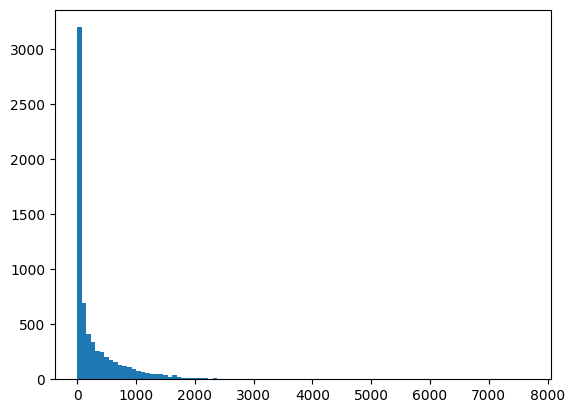

In [ ]:
# Построение гистограммы распределения длин текстов в словах
seq_len = [len(x) for x in train_seq]
plt.hist(seq_len, 100)
plt.show()

train

In [ ]:
# Создаем массив (размерностью кол-во строк) х (макс длина emdedding последовательности) заполняем её 0
lens = np.zeros(len(train_seq), dtype=int)
for i in range(len(train_seq)):
    lens[i] = len(train_seq[i])

print(f'max - {max(lens)}, min - {min(lens)}')
x_train_data_emb = np.zeros((len(train_seq),max(lens)))

# Зальем в него Embedding поледовательности получится 1 вектор для каждой записи
for i in range(len(train_seq)):
    for j in range(len(train_seq[i])):
        x_train_data_emb[i,j] = train_seq[i][j]
print(x_train_data_emb.shape)
print(x_train_data_emb[1132])

max - 7672, min - 1
(6723, 7672)
[31. 12. 88. ...  0.  0.  0.]


val

In [ ]:
# Создаем массив (размерностью кол-во строк) х (макс длина emdedding последовательности) заполняем её 0
lens = np.zeros(len(val_seq), dtype=int)
for i in range(len(val_seq)):
    lens[i] = len(val_seq[i])

print(f'max - {max(lens)}, min - {min(lens)}')
x_val_data_emb = np.zeros((len(val_seq),max(lens)))

# Зальем в него Embedding поледовательности получится 1 вектор для каждой записи
for i in range(len(val_seq)):
    for j in range(len(val_seq[i])):
        x_val_data_emb[i,j] = val_seq[i][j]
print(x_val_data_emb.shape)
print(x_val_data_emb[132])

max - 2370, min - 1
(374, 2370)
[108. 107.   5. ...   0.   0.   0.]


test

In [ ]:
# Создаем массив (размерностью кол-во строк) х (макс длина emdedding последовательности) заполняем её 0
lens = np.zeros(len(test_seq), dtype=int)
for i in range(len(test_seq)):
    lens[i] = len(test_seq[i])

print(f'max - {max(lens)}, min - {min(lens)}')
x_test_data_emb = np.zeros((len(test_seq),max(lens)))

# Зальем в него Embedding поледовательности получится 1 вектор для каждой записи
for i in range(len(test_seq)):
    for j in range(len(test_seq[i])):
        x_test_data_emb[i,j] = test_seq[i][j]
print(x_test_data_emb.shape)
print(x_test_data_emb[132])

max - 6067, min - 1
(343, 6067)
[2518.   16. 1586. ...    0.    0.    0.]


Урезанный эмбеддинг

In [ ]:
# Создание "урезанной" эмбединг последовательности (для эксперементов с LSTM и подобными слоями)
seq_max_len = 1000
train_seq_1k = pad_sequences(train_seq, maxlen=seq_max_len)
val_seq_1k = pad_sequences(val_seq, maxlen=seq_max_len)
test_seq_1k = pad_sequences(test_seq, maxlen=seq_max_len)

train

In [ ]:
x_train_data_emb_1k = np.zeros((len(train_seq_1k),seq_max_len))

# Зальем в него Embedding поледовательности получится 1 вектор для каждой записи
for i in range(len(train_seq_1k)):
    for j in range(len(train_seq_1k[i])):
        x_train_data_emb_1k[i,j] = train_seq_1k[i][j]
print(x_train_data_emb_1k.shape)
# print(x_train_data_emb_1k[1132])

(6723, 1000)


val

In [ ]:
x_val_data_emb_1k = np.zeros((len(val_seq_1k),seq_max_len))

# Зальем в него Embedding поледовательности получится 1 вектор для каждой записи
for i in range(len(val_seq_1k)):
    for j in range(len(val_seq_1k[i])):
        x_val_data_emb_1k[i,j] = val_seq_1k[i][j]
print(x_val_data_emb_1k.shape)
# print(x_train_data_emb_1k[1132])

(374, 1000)


test

In [ ]:
x_test_data_emb_1k = np.zeros((len(test_seq_1k),seq_max_len))

# Зальем в него Embedding поледовательности получится 1 вектор для каждой записи
for i in range(len(test_seq_1k)):
    for j in range(len(test_seq_1k[i])):
        x_test_data_emb_1k[i,j] = test_seq_1k[i][j]
print(x_test_data_emb_1k.shape)
# print(x_train_data_emb_1k[1132])

(343, 1000)


### Остальные данные

In [ ]:
# Список столбцов для исключения
exclude_cols = ['Target', 'Транскрибация', 'Имя датасета']

#### train

In [ ]:
# Получаем список всех столбцов в df
all_cols = all_df_train.columns.tolist()

# Исключаем ненужные столбцы
cols_to_use = [c for c in all_cols if c not in exclude_cols]

# Создаем train_x_data на основе отобранных столбцов
train_x_data = all_df_train[cols_to_use]

 #### val

In [ ]:
# Получаем список всех столбцов в df
all_cols = all_df_val.columns.tolist()

# Исключаем ненужные столбцы
cols_to_use = [c for c in all_cols if c not in exclude_cols]

# Создаем train_x_data на основе отобранных столбцов
val_x_data = all_df_val[cols_to_use]

 #### test

In [ ]:
# Получаем список всех столбцов в df
all_cols = all_df_test.columns.tolist()

# Исключаем ненужные столбцы
cols_to_use = [c for c in all_cols if c not in exclude_cols]

# Создаем train_x_data на основе отобранных столбцов
test_x_data = all_df_test[cols_to_use]

### y_data

train

In [ ]:
train_y_data = np.array(all_df_train['Target'].values)
print(train_y_data.shape)
train_y_data[:20]

(6723,)


array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0])

val

In [ ]:
val_y_data = np.array(all_df_val['Target'].values)
print(val_y_data.shape)
val_y_data[:20]

(374,)


array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

test

In [ ]:
test_y_data = np.array(all_df_test['Target'].values)
print(test_y_data.shape)
test_y_data[:20]

(343,)


array([0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0])

## Сохранение выборок

In [ ]:
# Сохранение выборок.
with open('/content/drive/MyDrive/Datasets/Звонки/Модели и выборки/x_y_data.pkl', 'wb') as f:
    pkl.dump([bow_train_txt, bow_val_txt, bow_test_txt, x_train_data_emb, x_val_data_emb, x_test_data_emb, x_train_data_emb_1k, x_val_data_emb_1k, x_test_data_emb_1k, train_x_data, val_x_data, test_x_data, train_y_data, val_y_data, test_y_data], f)

In [ ]:
# Сохранение токенайзера.
with open('/content/drive/MyDrive/Datasets/Звонки/Модели и выборки/tokenizer.pkl', 'wb') as f:
    pkl.dump(tokenizer_txt, f)

# Обучение моделей

## Подключение библиотек

In [ ]:
import pickle as pkl
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import *
from tensorflow.keras import utils
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

## Загрузка выборок train, test

In [ ]:
# Загрузка выборок
with open('/content/drive/MyDrive/Datasets/Звонки/Модели и выборки/x_y_data.pkl', 'rb') as f:
    bow_train_txt, bow_val_txt, bow_test_txt, x_train_data_emb, x_val_data_emb, x_test_data_emb, x_train_data_emb_1k, x_val_data_emb_1k, x_test_data_emb_1k, train_x_data, val_x_data, test_x_data, train_y_data, val_y_data, test_y_data = pkl.load(f)

In [ ]:
# Задаем валидационные данные
X_val = [bow_val_txt, x_val_data_emb, val_x_data]
y_val = val_y_data

In [ ]:
# Колбак
mycolback_2 = ModelCheckpoint('/content/drive/MyDrive/Datasets/Звонки/Модели и выборки/model_2',
                        save_format = 'tf',
                        monitor='val_accuracy',
                        verbose=1,
                        mode='max',
                        save_best_only=True)

In [ ]:
# Создание раветвленной модели
input_x2 = Input(shape=(bow_train_txt.shape[1]), name = 'input_x2')

input_x1 = Input(shape=(x_train_data_emb_1k.shape[1]), name = 'input_x1')

input_x3 = Input(shape=(train_x_data.shape[1]), name = 'input_x3')

x1 = Embedding(input_dim = 35000, output_dim =40, input_length = x_train_data_emb_1k.shape[1], name = 'Embedding1_x1') (input_x1)
x1 = SpatialDropout1D(0.4 , name = 'Dropout1_x1') (x1)
x1 = BatchNormalization() (x1)
x1 = Conv1D(20, 5, activation='relu') (x1)
x1 = Conv1D(10, 5, activation='relu') (x1)
x1 = MaxPool1D(2) (x1)
x1 = Flatten(name = 'Flatten1_x1') (x1)
#x1 = Dropout(0.6) (x1)
#x1 = Dense(128, activation = 'relu') (x1)
#x1 = Dropout(0.5) (x1)
x1 = Dense(32, activation = 'relu') (x1)

x2 = Dense(48, activation = 'relu') (input_x2)
x2 = BatchNormalization() (x2)
x2 = Dropout(0.6) (x2)
#x2 = Dense(32, activation = 'relu') (x2)
#x2 = Dropout(0.5) (x2)
x2 = Dense(16, activation = 'relu') (x2)

x3 = Dense(32, activation = 'relu') (input_x3)
x3 = BatchNormalization() (x3)
x3 = Dropout(0.6) (x3)
x3 = Dense(16, activation = 'relu') (x3)

x = concatenate([x1, x2, x3])
x = BatchNormalization() (x)
x = Dense(16, activation='relu') (x)

x = Dropout(0.5) (x)

output = Dense(1, activation='sigmoid', name = 'output') (x)

model2 = Model ([input_x1, input_x2, input_x3], output)

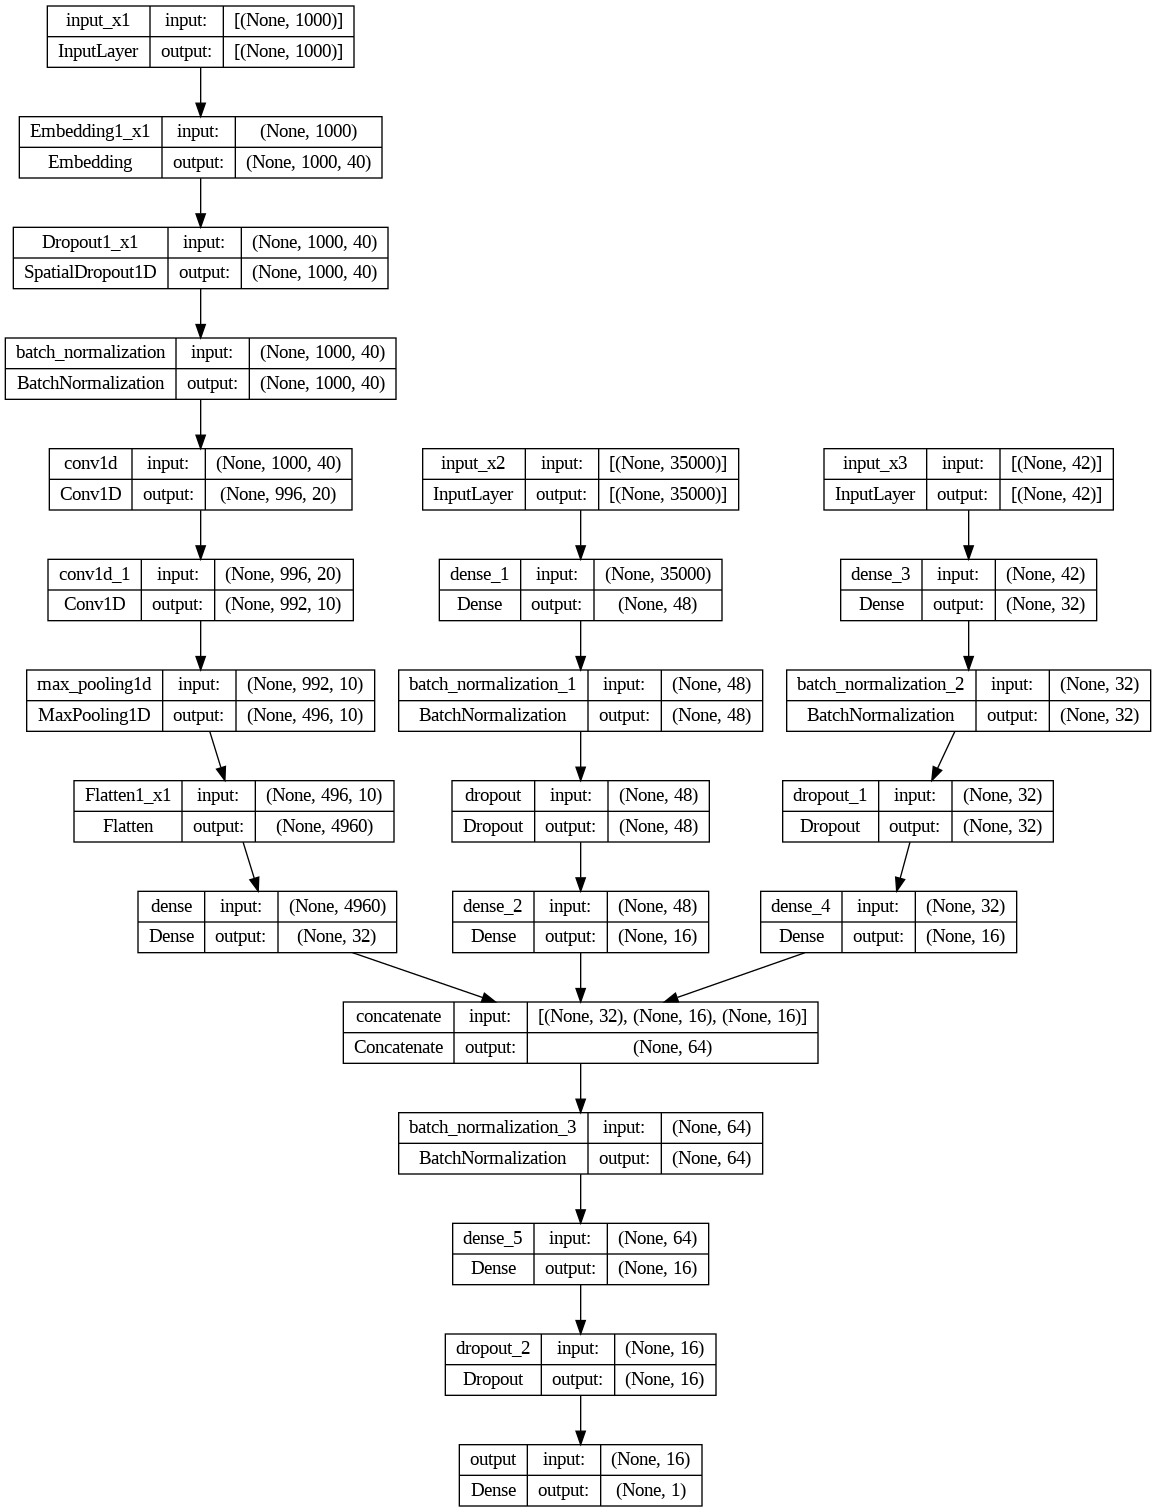

In [ ]:
# Её структура
utils.plot_model(model2, show_shapes=True)

In [ ]:
# Тренировочные данные
train_data = {'input_x2': bow_train_txt, 'input_x1': x_train_data_emb_1k, 'input_x3': train_x_data}
# Валидационные данные
val_data = {'input_x2': bow_val_txt, 'input_x1': x_val_data_emb_1k, 'input_x3': val_x_data}

In [ ]:
# Компиляция и дообучение
model2.compile(optimizer=Adam(learning_rate=0.00001), loss='binary_crossentropy', metrics=['accuracy'])
history_m2_1 = model2.fit(train_data, train_y_data, batch_size=64, validation_data=(val_data, y_val), epochs=10, verbose=1, callbacks=mycolback_2, shuffle=True)

Epoch 1/10
106/106 [==============================] - ETA: 0s - loss: 0.8125 - accuracy: 0.5100
Epoch 1: val_accuracy improved from -inf to 0.55080, saving model to /content/drive/MyDrive/Datasets/Звонки/Модели и выборки/model_2
106/106 [==============================] - 34s 289ms/step - loss: 0.8125 - accuracy: 0.5100 - val_loss: 0.6865 - val_accuracy: 0.5508
Epoch 2/10
106/106 [==============================] - ETA: 0s - loss: 0.7116 - accuracy: 0.6040
Epoch 2: val_accuracy improved from 0.55080 to 0.60428, saving model to /content/drive/MyDrive/Datasets/Звонки/Модели и выборки/model_2
106/106 [==============================] - 29s 269ms/step - loss: 0.7116 - accuracy: 0.6040 - val_loss: 0.6799 - val_accuracy: 0.6043
Epoch 3/10
105/106 [============================>.] - ETA: 0s - loss: 0.6784 - accuracy: 0.6479
Epoch 3: val_accuracy improved from 0.60428 to 0.72727, saving model to /content/drive/MyDrive/Datasets/Звонки/Модели и выборки/model_2
106/106 [==============================

In [ ]:
# Компиляция и дообучение
model2.compile(optimizer=Adam(learning_rate=0.00001), loss='binary_crossentropy', metrics=['accuracy'])
history_m2_1 = model2.fit(train_data, train_y_data, batch_size=64, validation_data=(val_data, y_val), epochs=20, verbose=1, callbacks=mycolback_2, shuffle=True)

Epoch 1/20
105/106 [============================>.] - ETA: 0s - loss: 0.5316 - accuracy: 0.7437
Epoch 1: val_accuracy did not improve from 0.83422
106/106 [==============================] - 30s 242ms/step - loss: 0.5315 - accuracy: 0.7437 - val_loss: 0.4369 - val_accuracy: 0.8235
Epoch 2/20
106/106 [==============================] - ETA: 0s - loss: 0.5233 - accuracy: 0.7538
Epoch 2: val_accuracy did not improve from 0.83422
106/106 [==============================] - 28s 263ms/step - loss: 0.5233 - accuracy: 0.7538 - val_loss: 0.4265 - val_accuracy: 0.8262
Epoch 3/20
105/106 [============================>.] - ETA: 0s - loss: 0.5102 - accuracy: 0.7621
Epoch 3: val_accuracy did not improve from 0.83422
106/106 [==============================] - 25s 235ms/step - loss: 0.5107 - accuracy: 0.7619 - val_loss: 0.4190 - val_accuracy: 0.8289
Epoch 4/20
106/106 [==============================] - ETA: 0s - loss: 0.5081 - accuracy: 0.7657
Epoch 4: val_accuracy did not improve from 0.83422
106/106 [=

In [ ]:
# Компиляция и дообучение
model2.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
history_m2_2 = model2.fit(train_data, train_y_data, batch_size=64, validation_data=(val_data, y_val), epochs=50, verbose=1, callbacks=mycolback_2, shuffle=True)

Epoch 1/50
106/106 [==============================] - ETA: 0s - loss: 0.3896 - accuracy: 0.8416
Epoch 1: val_accuracy improved from 0.84759 to 0.86631, saving model to /content/drive/MyDrive/Datasets/Звонки/Модели и выборки/model_2
106/106 [==============================] - 35s 297ms/step - loss: 0.3896 - accuracy: 0.8416 - val_loss: 0.2981 - val_accuracy: 0.8663
Epoch 2/50
105/106 [============================>.] - ETA: 0s - loss: 0.2914 - accuracy: 0.8908
Epoch 2: val_accuracy improved from 0.86631 to 0.89305, saving model to /content/drive/MyDrive/Datasets/Звонки/Модели и выборки/model_2
106/106 [==============================] - 28s 263ms/step - loss: 0.2915 - accuracy: 0.8907 - val_loss: 0.2163 - val_accuracy: 0.8930
Epoch 3/50
105/106 [============================>.] - ETA: 0s - loss: 0.2305 - accuracy: 0.9149
Epoch 3: val_accuracy improved from 0.89305 to 0.89840, saving model to /content/drive/MyDrive/Datasets/Звонки/Модели и выборки/model_2
106/106 [===========================

In [ ]:
# Компиляция и дообучение
model2.compile(optimizer=Adam(learning_rate=0.002), loss='binary_crossentropy', metrics=['accuracy'])
history_m2_3 = model2.fit(train_data, train_y_data, batch_size=64, validation_data=(val_data, y_val), epochs=20, verbose=1, callbacks=mycolback_2, shuffle=True)

Epoch 1/20
105/106 [============================>.] - ETA: 0s - loss: 0.0331 - accuracy: 0.9906
Epoch 1: val_accuracy did not improve from 0.91444
106/106 [==============================] - 32s 255ms/step - loss: 0.0331 - accuracy: 0.9906 - val_loss: 0.8543 - val_accuracy: 0.8743
Epoch 2/20
106/106 [==============================] - ETA: 0s - loss: 0.0498 - accuracy: 0.9862
Epoch 2: val_accuracy did not improve from 0.91444
106/106 [==============================] - 32s 302ms/step - loss: 0.0498 - accuracy: 0.9862 - val_loss: 0.5889 - val_accuracy: 0.8770
Epoch 3/20
105/106 [============================>.] - ETA: 0s - loss: 0.0504 - accuracy: 0.9857
Epoch 3: val_accuracy did not improve from 0.91444
106/106 [==============================] - 25s 237ms/step - loss: 0.0504 - accuracy: 0.9857 - val_loss: 0.5015 - val_accuracy: 0.8904
Epoch 4/20
106/106 [==============================] - ETA: 0s - loss: 0.0508 - accuracy: 0.9851
Epoch 4: val_accuracy did not improve from 0.91444
106/106 [=

In [ ]:
model2 = load_model('/content/drive/MyDrive/Datasets/Звонки/Модели и выборки/model_2')

In [ ]:
# Валидационные данные
test_data = {'input_x2': bow_test_txt, 'input_x1': x_test_data_emb_1k, 'input_x3': test_x_data}

In [ ]:
y_pred = model2.predict(test_data)


11/11 [==============================] - 0s 23ms/step


In [ ]:
y_true = np.array(all_df_test['Target'].values)

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

In [ ]:
threshold = 0.5
y_pred_binary = (y_pred > threshold).astype(int)

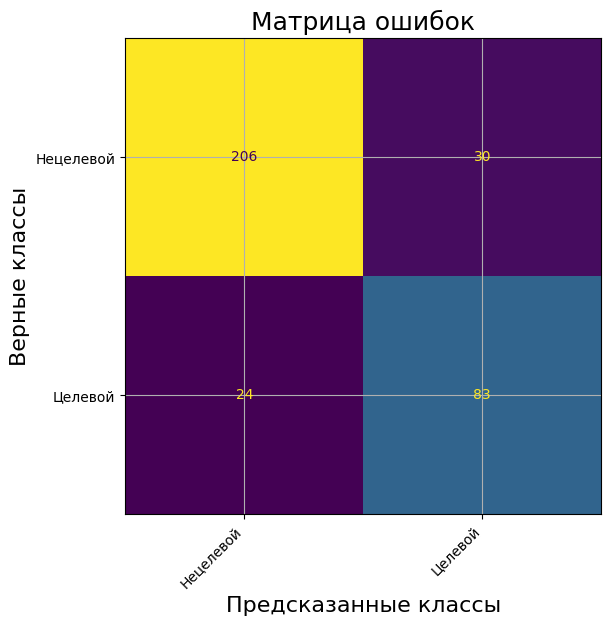

In [ ]:
# Построение матрицы ошибок
cm = confusion_matrix(y_true, y_pred_binary)

# Отрисовка матрицы ошибок
fig, ax = plt.subplots(figsize=(7, 7))
ax.set_title(f'Матрица ошибок', fontsize=18)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Нецелевой','Целевой'])
disp.plot(ax=ax)
plt.style.use('fivethirtyeight')
plt.grid(None)
plt.gca().images[-1].colorbar.remove()
plt.xlabel('Предсказанные классы', fontsize=16)
plt.ylabel('Верные классы', fontsize=16)
fig.autofmt_xdate(rotation=45)
plt.show()

In [ ]:
print(classification_report(y_true, y_pred_binary))

              precision    recall  f1-score   support

           0       0.90      0.87      0.88       236
           1       0.73      0.78      0.75       107

    accuracy                           0.84       343
   macro avg       0.82      0.82      0.82       343
weighted avg       0.85      0.84      0.84       343

